This code is to find the lowest eigenvalue of the matrix

$$U=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & -1 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

using the VQE algorithm.

We define a simple variational ansatz using rotation gates (RY) and a CNOT gate. This is a parametrized quantum circuit.

We use a 2-qubit quantum device (default.qubit).

The cost function computes the expectation value of the Hermitian observable 𝐻.

We use a gradient descent optimizer to minimize the cost function and find the optimal parameters that give the lowest eigenvalue of U.

We track the energy values during optimization and plot the convergence of the energy.

Lastly we compare it with analytical calcualtion of the eigenvalues and see that the value matches very closely with the lowest eigenvalue.

Compare this code with the VQE Qiskit code on your github.

Step = 0,  Energy = 0.11605773,  Convergence parameter = 0.14799849
Step = 10,  Energy = -0.10625805,  Convergence parameter = 0.03704090
Step = 20,  Energy = -0.99455079,  Convergence parameter = 0.00936440

Final value of the ground-state energy = -0.99999944
Optimal parameters:  [-1.57004805e+00  7.48090028e-04  1.63746336e+00  1.50412790e+00]


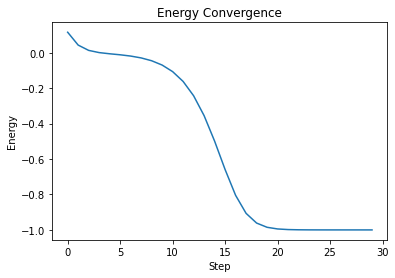

In [25]:
import pennylane as qml
from pennylane import numpy as np

# Define the unitary matrix U as a Hermitian observable
U = np.array([[1, 0, 0, 0],
              [0, 0, -1, 0],
              [0, -1, 0, 0],
              [0, 0, 0, 1]])

# The matrix U is not Hermitian, but since VQE deals with Hermitian operators, 
# we need to construct a Hermitian observable that encodes the eigenvalues of U.
H = qml.Hermitian(U, wires=[0, 1])

# Define a 2-qubit quantum device
dev = qml.device('default.qubit', wires=2)

# Define a variational ansatz circuit
def variational_ansatz(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(params[2], wires=0)
    qml.RY(params[3], wires=1)

# Define the cost function
@qml.qnode(dev)
def cost(params):
    variational_ansatz(params)
    return qml.expval(H)

# Initialize the parameters
np.random.seed(42)
params = np.random.random(4)

# Choose an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
max_iterations = 100
conv_tol = 1e-06

# Store the values of the cost function
energy = []

# Optimization loop
for n in range(max_iterations):
    params, prev_cost = opt.step_and_cost(cost, params)
    current_cost = cost(params)
    energy.append(current_cost)
    conv = np.abs(current_cost - prev_cost)

    if n % 10 == 0:
        print(f"Step = {n},  Energy = {current_cost:.8f},  Convergence parameter = {conv:.8f}")

    if conv <= conv_tol:
        break

print("\nFinal value of the ground-state energy = {:.8f}".format(current_cost))
print("Optimal parameters: ", params)

# Plot the energy convergence
import matplotlib.pyplot as plt
plt.plot(energy)
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Energy Convergence")
plt.show()


In [26]:
# Find eigenvalues
eigenvalues, _ = np.linalg.eig(U)

# Print the eigenvalues
print("Eigenvalues of the matrix U:")
print(eigenvalues)


Eigenvalues of the matrix U:
[ 1. -1.  1.  1.]
